In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
from numpy.linalg import matrix_power

# 1D Ising model + Transfer matrix

* Construct the transfer matrix at temperature $T$ with external field $B$
* Find the eivenvalues of the transfer matrix and compare to the exact results.
* Evaluate the partition function $Z$ at different system size $N$ and $T$, $B$. Compare to the exact results.
* For a fixed $N$, $T$, $B$, evaluate $\langle S_0 S_j\rangle$ where $j=0,1,\cdots N$. 
* Plot $\langle S_0 S_j\rangle$ up to $j=N/2$ and show that it decays exponentially.
  * Please try several $N$, $T$, $B$. What is the largest $N$ you can go? What is the lowest $T$ you can go?

In [3]:
J = 1.0
kB = 2.0

In [4]:
def impurity_matrix():
    return np.array([[1, 0],[0, -1]])

def transfer_matrix(T, B):
    beta = 1/(kB*T)
    return np.array ([[np.exp(beta*J+beta*B), np.exp(-beta*J)],
                     [np.exp(-beta*J), np.exp(beta*J-beta*B)]])

T = transfer_matrix(1, 0)
Tz = impurity_matrix()

In [5]:
# Eigenvalue

from numpy import linalg as LA

T = transfer_matrix(1, 0)

for i in range (1,50):
    
    w_i, v_i = LA.eig(matrix_power(T, i))
        
    print(w_i)

[2.25525193 1.04219061]
[5.08616127 1.08616127]
[11.47057502  1.13198708]
[25.86903646  1.1797463 ]
[58.34119442  1.22952052]
[131.57409133   1.28139474]
[296.73272346   1.33545757]
[669.2070474    1.39180134]
[1.50923049e+03 1.45052229e+00]
[3.40369497e+03 1.51172071e+00]
[7.67618964e+03 1.57550113e+00]
[1.73117415e+04 1.64197249e+00]
[3.90423385e+04 1.71124831e+00]
[8.80503092e+04 1.78344692e+00]
[1.98575630e+05 1.85869164e+00]
[4.47838072e+05 1.93711097e+00]
[1.00998768e+06 2.01883887e+00]
[2.27777666e+06 2.10401491e+00]
[5.13696021e+06 2.19278459e+00]
[1.15851394e+07 2.28529951e+00]
[2.61274080e+07 2.38171769e+00]
[5.89238874e+07 2.48220381e+00]
[1.32888211e+08 2.58692949e+00]
[2.99696394e+08 2.69607365e+00]
[6.75890871e+08 2.80982268e+00]
[1.52430419e+09 2.92837071e+00]
[3.43768997e+09 3.05191994e+00]
[7.75285695e+09 3.18068218e+00]
[1.74846456e+10 3.31487465e+00]
[3.94322807e+10 3.45473862e+00]
[8.89297272e+10 3.60048676e+00]
[2.00558939e+11 3.75241089e+00]
[4.52310934e+11 3.9107

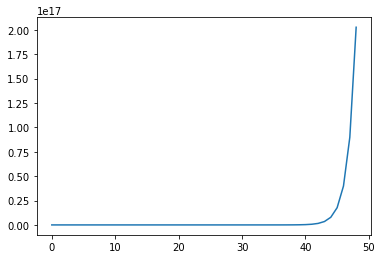

array([3.29744254e+00, 6.17232254e+00, 1.26025621e+01, 2.70487828e+01,
       5.95707149e+01, 1.32855486e+02, 2.98068181e+02, 6.70598849e+02,
       1.51068101e+03, 3.40520669e+03, 7.67776514e+03, 1.73133835e+04,
       3.90440497e+04, 8.80520926e+04, 1.98577488e+05, 4.47840009e+05,
       1.00998970e+06, 2.27777876e+06, 5.13696240e+06, 1.15851417e+07,
       2.61274104e+07, 5.89238899e+07, 1.32888213e+08, 2.99696397e+08,
       6.75890874e+08, 1.52430420e+09, 3.43768998e+09, 7.75285695e+09,
       1.74846456e+10, 3.94322807e+10, 8.89297272e+10, 2.00558939e+11,
       4.52310934e+11, 1.02007511e+12, 2.30052636e+12, 5.18826651e+12,
       1.17008481e+13, 2.63883602e+13, 5.95124002e+13, 1.34215455e+14,
       3.02689665e+14, 6.82641451e+14, 1.53952845e+15, 3.47202451e+15,
       7.83028998e+15, 1.76592766e+16, 3.98261176e+16, 8.98179286e+16,
       2.02562057e+17])

In [6]:
# pratition function
# T=1, B=0, N=i

T = transfer_matrix(1, 0)

z_f = np.array([])

for i in range (1,50):
    
    z = np.trace(matrix_power(T, i))
    z_f = np.append(z_f, z)
    
pylab.plot(z_f) 
pylab.show()
z_f

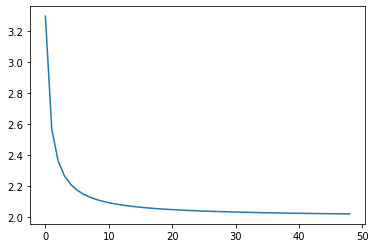

In [7]:
# pratition function
# T=i, B=0, N=2

T = transfer_matrix(1, 0)

z_f = np.array([])

for i in range (1,50):
    
    z = np.trace(transfer_matrix(i, 0))
    z_f = np.append(z_f, z)
    
    
pylab.plot(z_f) 
pylab.show()

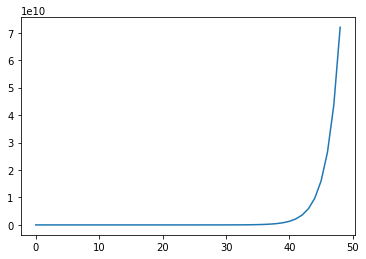

In [9]:
# pratition function
# T=1, B=i, N=2

T = transfer_matrix(1, 0)

z_f = np.array([])

for i in range (1,50):
    
    z = np.trace(transfer_matrix(1, i)) 
    z_f = np.append(z_f, z)
       

pylab.plot(z_f) 
pylab.show()

array([[ 1.56170387e+08, -1.56170381e+08],
       [-1.56170381e+08,  1.56170387e+08]])

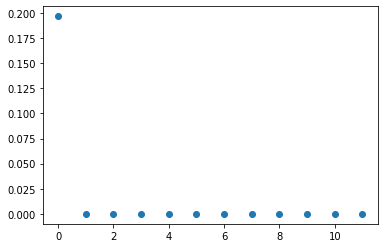

In [10]:
# T=1, B=0, N=?(this type of way has problem, so I write in another way) 

import warnings; warnings.simplefilter("always")
np.seterr(invalid='ignore')

Z = T@T
Z_Sz = Tz@T@T
Z_SzSz = Tz@T@Tz@T

N = 25 #25
T = transfer_matrix(1, 0)
Tz = impurity_matrix()

SzSz = np.zeros(N+1)

for j in range(N):
    z = np.eye(2)
    Z_SzSz = Tz
    for i in range(N):
        Z = Z @ T
        if i == j: 
            Z_SzSz = Z_SzSz @ Tz @ T
        else:
            Z_SzSz = Z_SzSz @ T
    SzSz[j] = np.trace(Z_SzSz)/np.trace(Z)
    
    SzSz[N] = SzSz[0]

plt.plot(SzSz[0:N//2], 'o') 


Z_SzSz

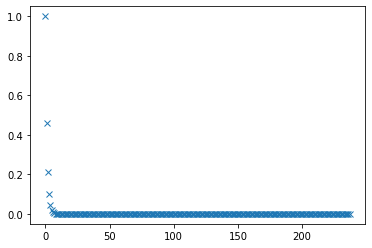

In [13]:
SzSz = np.zeros(N+1)
z0     = impurity_matrix()
T      = transfer_matrix(1,0)

N = 476

for j in range(N):
    z_s0sj = z0
    z = np.eye(2)
    for i in range(N):
        z = z.dot(T)
        if i==j:
            z_s0sj = z_s0sj.dot(z0).dot(T)
        else :
            z_s0sj = z_s0sj.dot(T)    
    SzSz[j] = np.trace(z_s0sj)/np.trace(z)
    
SzSz[N]=SzSz[0]

plt.subplot()
plt.plot(SzSz[0:N//2],'x')

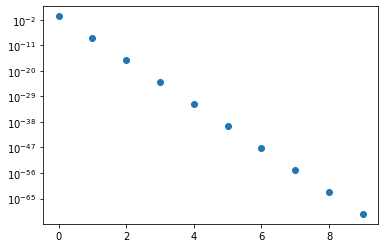

In [15]:
# T=?, B=0, N=21 (use another metod below)

import warnings; warnings.simplefilter("always")
np.seterr(invalid='ignore')

Z = T@T
Z_Sz = Tz@T@T
Z_SzSz = Tz@T@Tz@T

N = 21
t = 1 #10^308
T = transfer_matrix(t, 0)
Tz = impurity_matrix()

SzSz = np.zeros(N+1)

for j in range(0, N):
    z = np.eye(2)
    Z_SzSz = Tz
    for i in range(N):
        Z = Z @ T
        if i == j: 
            Z_SzSz = Z_SzSz @ Tz @ T
        else:
            Z_SzSz = Z_SzSz @ T
    SzSz[j] = np.trace(Z_SzSz)/np.trace(Z)
    
    SzSz[N] = SzSz[0]

pylab.semilogy(SzSz[0:N//2], 'o') 

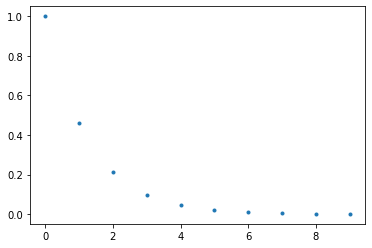

In [18]:
t = -273
N = 21

for j in range(N):
    z_s0sj = z0
    z = np.eye(2)
    for i in range(N):
        z = z.dot(T)
        if i==j:
            z_s0sj = z_s0sj.dot(z0).dot(T)
        else :
            z_s0sj = z_s0sj.dot(T)    
    SzSz[j] = np.trace(z_s0sj)/np.trace(z)
    
SzSz[N]=SzSz[0]
plt.plot(SzSz[0:N//2],'.')